<a href="https://colab.research.google.com/github/jae-hyuck/dl13/blob/main/notebook/ch03_l_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## intro to ML 
### sklean
 - iris : knn
 - logis : knn
 - confusion matrix (혼동행렬)

## iris dataset

In [ ]:
# iris dataset
from sklearn import datasets
iris = datasets.load_iris()

print(iris)

In [ ]:
iris.data.shape

In [ ]:
iris.target.shape

In [ ]:
print(iris.target_names)

### train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
y_train.shape, y_test.shape # 튜플 구조로 나옴

((120,), (30,))

### Training (학습)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) # 예측값

In [ ]:
y_pred , y_test

(array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

### 정확도 평가

In [ ]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9666666666666667


### 새 데이터에 적용

In [ ]:
#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 2개 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### Decision boundary

In [ ]:
############################################################
# Decision boundary
# from mlxtend.plotting import plot_decision_regions
############################################################
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions of two features
ft_names = iris.feature_names
two_feature_idx = [0,3]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('KNN3 on Iris')
plt.show()

In [ ]:
########################################################
# SVM
########################################################
# Training a classifier
from sklearn.svm import SVC

ft_names = iris.feature_names
two_feature_idx = [0,2]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=svm, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('SVM on Iris')
plt.show()
########################################################


---

## mnist data
 - knn

### Load digits dataset

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
str(digits)


'{\'data\': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 10.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 16.,  9.,  0.],\n       ...,\n       [ 0.,  0.,  1., ...,  6.,  0.,  0.],\n       [ 0.,  0.,  2., ..., 12.,  0.,  0.],\n       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), \'target\': array([0, 1, 2, ..., 8, 9, 8]), \'frame\': None, \'feature_names\': [\'pixel_0_0\', \'pixel_0_1\', \'pixel_0_2\', \'pixel_0_3\', \'pixel_0_4\', \'pixel_0_5\', \'pixel_0_6\', \'pixel_0_7\', \'pixel_1_0\', \'pixel_1_1\', \'pixel_1_2\', \'pixel_1_3\', \'pixel_1_4\', \'pixel_1_5\', \'pixel_1_6\', \'pixel_1_7\', \'pixel_2_0\', \'pixel_2_1\', \'pixel_2_2\', \'pixel_2_3\', \'pixel_2_4\', \'pixel_2_5\', \'pixel_2_6\', \'pixel_2_7\', \'pixel_3_0\', \'pixel_3_1\', \'pixel_3_2\', \'pixel_3_3\', \'pixel_3_4\', \'pixel_3_5\', \'pixel_3_6\', \'pixel_3_7\', \'pixel_4_0\', \'pixel_4_1\', \'pixel_4_2\', \'pixel_4_3\', \'pixel_4_4\', \'pixel_4_5\', \'pixel_4_6\', \'pixel_4_7\', \'pixel_5_0\', \'pixel_

In [2]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [3]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.images.shape, digits.data.shape

((1797, 8, 8), (1797, 64))

### 데이터 그리기

In [ ]:
plt.imshow(digits.images[7], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() # 2차원 영상 그리기
# digits.images.shape

In [15]:
digits.images.shape, len(digits.images)

((1797, 8, 8), 1797)

In [16]:
n_samples = len(digits.images) 
# digits.images.shape
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

0.9833333333333333
[3]


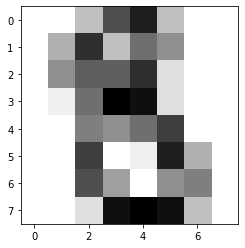

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

5 [5]


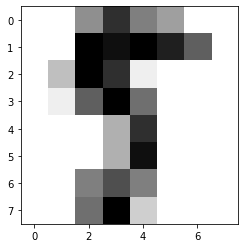

In [27]:
idx = 50
plt.imshow(X_test[idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[idx]])
print(y_test[idx], y_pred)

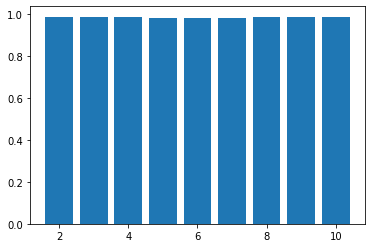

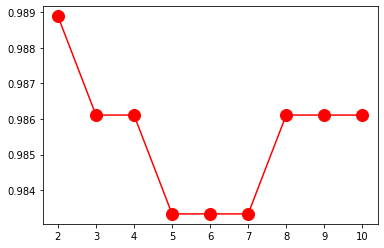

In [30]:
#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

scores

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()